## Histogram-based image enhancement

In [65]:
# Required Modules
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import numpy as np

### <span style=color:green> histogram stretching or shrinking </span>

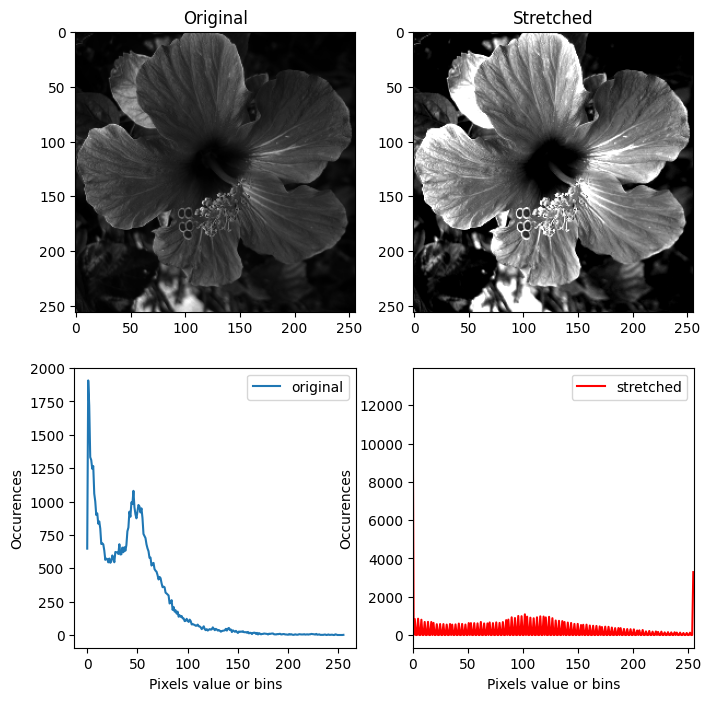

In [66]:
# Read the plant image
plant = cv2.imread("Images/plant.png", cv2.IMREAD_GRAYSCALE)

# Contrast stretching
#p2, p98 = np.percentile(plant, (2, 98))
#print(f"{p2}, {p98}")
plant_rescale = rescale_intensity(plant, in_range=(10, 100))

# Computing histogram
channels = [0]    # Image channel where to compute
mask = None       # Else compute the part of image selected
histSize = [256]  # Channel Histogram size  or histogram quantification: 8, 16, 32, 64 ...
ranges = [0, 256] # Include pixels values from 0 to 255
plant_hist = cv2.calcHist([plant], channels, mask, histSize, ranges)
plant_rescale_hist = cv2.calcHist([plant_rescale],channels=[0], mask=None, histSize=[256], ranges=[0,256])

# Ploting Results
plt.figure(figsize=[8,8])
plt.subplot(221); plt.imshow(plant, cmap="gray"); plt.title("Original")
plt.subplot(222); plt.imshow(plant_rescale, cmap="gray"); plt.title("Stretched")
plt.subplot(223); plt.plot(plant_hist, label="original");plt.legend(); plt.xlabel('Pixels value or bins'); plt.ylabel('Occurences')   # Add plt.savefig() to save in current folder
plt.subplot(224); plt.plot(plant_rescale_hist, label="stretched", color='r'); plt.xlim([0, 256]); plt.legend(); plt.xlabel('Pixels value or bins'); plt.ylabel('Occurences') 
plt.show()

### <span style=color:green> Histogram Equalization </span>

[[ 4  3  3 ...  0  0  0]
 [ 4  3  4 ...  0  0  0]
 [ 4  5  7 ...  0  0  0]
 ...
 [75 42  8 ...  1  1  2]
 [61 60 15 ...  1  1  1]
 [31 57 45 ...  1  1  2]] 

[[ 25  19  19 ...   0   0   0]
 [ 25  19  25 ...   0   0   0]
 [ 25  30  39 ...   0   0   0]
 ...
 [223 132  43 ...   7   7  14]
 [197 194  65 ...   7   7   7]
 [102 186 143 ...   7   7  14]]


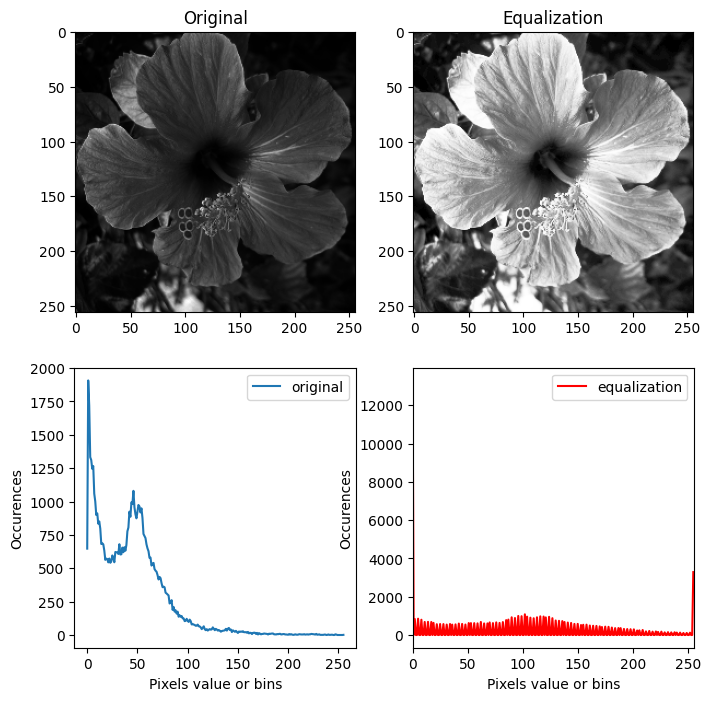

In [67]:
# Equalization
plant_eq = cv2.equalizeHist(plant)  # We can also use skimage here

# Histogram
plant_eq_hist = cv2.calcHist([plant_rescale],channels=[0], mask=None, histSize=[256], ranges=[0,256])

print(plant,"\n")
print(plant_eq)

# Plotting results
plt.figure(figsize=[8,8])
plt.subplot(221); plt.imshow(plant, cmap="gray"); plt.title("Original")
plt.subplot(222); plt.imshow(plant_eq, cmap="gray"); plt.title("Equalization")
plt.subplot(223); plt.plot(plant_hist, label="original"); plt.legend(); plt.xlabel('Pixels value or bins'); plt.ylabel('Occurences')   # Add plt.savefig() to save in current folder
plt.subplot(224); plt.plot(plant_eq_hist, label="equalization", color='r'); plt.xlim([0, 256]); plt.legend(); plt.xlabel('Pixels value or bins'); plt.ylabel('Occurences') 
plt.show()
